# Correcting for Distortion

There are two main steps to this process: use chessboard images to obtain image points and object points, and then use the OpenCV functions `cv2.calibrateCamera()` and `cv2.undistort()` to compute the calibration and undistortion.

In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
# Read in the saved objpoints and imgpoints
picke_path = './pickle/'
dist_pickle = pickle.load( open( picke_path+"wide_dist_pickle.p", "rb" ) )
objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]

In [3]:
# Read in an image
path = './img/'
img = cv2.imread(path+'test_image.png')

In [4]:
# TODO: Write a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    imsize = img.shape[0:2]
    ret, mtx, dist, rvecs, tvecs =  cv2.calibrateCamera(objpoints,imgpoints,imsize,None,None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

In [5]:
undistorted = cal_undistort(img, objpoints, imgpoints)

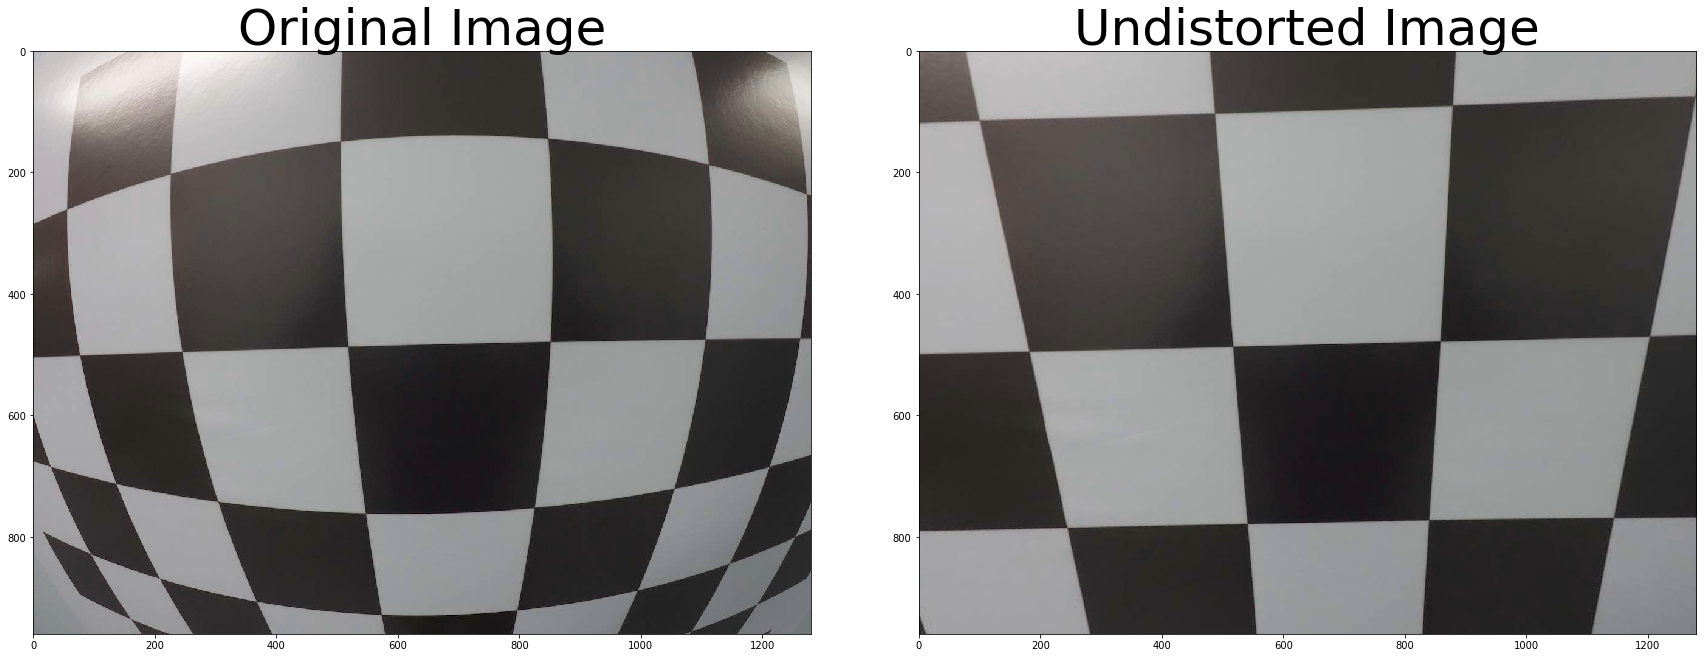

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)